# Get a used car for a fair price

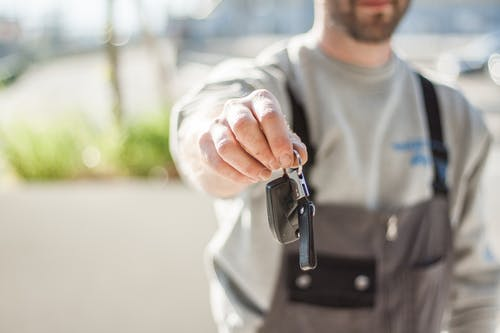

The auto industry is changing rapidly and car prices are only going up. So to speak, new cars are getting costlier each year, making them a very high value purchase for the common man. And quite ironically, the average life span of a car is going down despite the steady rise in prices, which brings in good news for potential used car buyers! Thanks to manufacturers launching newer versions of their models sooner now as compared to a few years ago, more and more modern cars are now entering the used car market, which makes it easy for you to make a good buy without having to bust your wallet.

A used car in fact makes more sense for first time buyers upgrading from two-wheelers or public transportation, or for that matter, someone looking to buy a second set of wheels in the family. Now here’s five reasons clarifying why buying a used car instead of a new car is more sensible.

## Reasons to buy a used car

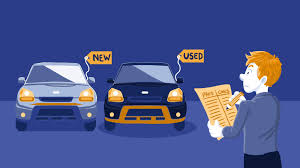

### 1: Save money and you can even upgrade your segment

All it takes is less than a minute for a new car, straight out from a showroom, to lose 8-10% of its purchase price as it enters used car territory. Going for used purchase means you have to pay a lot less than the original value of the car (depending on year of manufacture and kilometres done) which means you can save some serious money.

### 2: Slower depreciation means you lose less money 

Every car undergoes depreciation but a used car has an upper hand for the same when compared to a new car. It depreciates at a slower rate when compared to a brand new car. Let’s find out how: Depreciation of a vehicle is at its peak during the first three years of purchase. When you are buying a used car, you will obviously purchase it at a price which has already gone under major depreciation.

### 3: Insurance is cheaper

Getting your used car insured will cost you a lot less as compared to a new car. That along with soaring additional taxes and other clauses makes a new car quite expensive.

### 4: Tension free drive 24x7 

A used car comes with its own perks. The primary benefit has to be the feeling of driving tension-free, without the jitters of getting that first dent or scratch, something only a brand new car is prone to. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("tab10")
import plotly.graph_objs as go
import plotly.express as px

import category_encoders as ce

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# reading .csv file
df=pd.read_csv('../input/input-data/CAR DETAILS FROM CAR DEKHO.csv')
print('Dataframe has {} rows and {} columns'.format(df.shape[0],df.shape[1]))
df.head()

creating two new columns to save brand and car name

In [ ]:
df['brand']=df['name'].apply(lambda x: ' '.join(x.split(' ')[:2]) if 'Land' in x else x.split(' ')[0])
df['car']=df['name'].apply(lambda x: ' '.join(x.split(' ')[2:]) if 'Land' in x else ' '.join(x.split(' ')[1:]))
df.head()

In [ ]:
#list of all brands and cars
brands=list(df['brand'].unique())
cars=list(df['car'].unique())

In [ ]:
bharat_stage= [text for idx,text in enumerate(cars) if "BS" in text]
bharat_stage[:5]

### Cleaning the data
few car names have bharat stage emission standards in them, which are creating duplicate values.
cleaning the text to get accurate results

In [ ]:
def removing_BS(text):
    text= re.sub('BS-VI|BS-IV|BS-III|BS-II|BS VI|BS IV|BS III|BS II|BS I|BSVI|BSIV|BSIII|BSII|BS I|','',text)
    return text

Stopwords=set(stopwords.words('english'))
def removing_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in Stopwords])

df['car']=df['car'].apply(lambda text: removing_BS(text).lower())
df['car']=df['car'].apply(lambda text:removing_stopwords(text))
df.head()

In [ ]:
car_rename={'Maruti':{'alto':'Alto','dzire':'Swift Dzire','swift':'Swift','wagon':'Wagon R','ertiga':'Ertiga','sx4':'SX4',
                      'celerio':'Celerio','cross':'S-Cross','zen':'Zen','baleno':'Baleno','eeco':'Eeco','omni':'Omni',
                      'star':'A-Star','ritz':'Ritz','esteem':'Esteem','800':'800','vitara':'Brezza','ignis':'Ignis',
                      'gypsy':'Gypsy','presso':'S-Presso','ciaz':'Ciaz','estilo':'Estilo'},
           'Hyundai':{'elite':'Elite i20','grand':'Grand i10','active':'i20 active','eon':'Eon','santro':'Santro','sonata':'Sonata',
                      'i10':'i10','verna':'Verna','i20':'i20','creta':'Creta','xcent':'Xcent','accent':'Accent','getz':'Getz',
                      'elantra':'Elantra','venue':'Venue','tucson':'Tucson','santa':'Santa Fe'},
           'Datsun':{'redi':'Redigo','plus':'Go Plus','go':'Go'},
           'Honda':{'amaze':'Amaze','jazz':'Jazz','city':'City','br-v':'BR-V','wr-v':'WR-V','brio':'Brio','mobilio':'Mobilio',
                   'civic':'Civic','accord':'Accord','cr-v':'CR-V','brv':'BR-V'},
           'Tata':{'nano':'Nano','vista':'Indica Vista','indigo':'Indigo','indica':'Indica','safari':'Safari','nexon':'Nexon',
                  'manza':'Manza','zest':'Zest','sumo':'Sumo','bolt':'Bolt','hexa':'Hexa','tigor':'Tigor','tiago':'Tiago',
                  'xenon':'Nexon','harrier':'Harrier','aria':'Aria','altroz':'Altroz','venture':'Venture','spacio':'Sumo','winger':'Winger'},
           'Chevrolet':{'beat':'Beat','spark':'Spark','cruze':'Cruze','sail':'Sail','optra':'Optra','aveo':'Aveo','enjoy':'Enjoy',
                       'captiva':'Captiva','tavera':'Tavera'},
           'Toyota':{'innova':'Innova','fortuner':'Fortuner','etios':'Etios','corolla':'Corolla','camry':'Camry','yaris':'Yaris',
                    'qualis':'Qualis'},
           'Jaguar':{'xf 3.0 litre':'XF','xf 5.0 litre':'XF','xj 5.0':'XJ','xf 2.2 litre':'XF'},
           'Mercedes-Benz':{'c-class':'C-Class','e-class':'E-Class','m-class':'M-Class','b-class':'B-Class',
                            's-class':'S-Class','gls':'GLS','gl-class 350':'GL350','b class':'B-Class'},
           'Audi':{'a6':'A6','a4':'A4','q3':'Q3','q5':'Q5','a8':'A8','q3':'Q3','q7':'Q7','a5':'A5','rs7':'RS7'},
           'Skoda':{'laura':'Laura','rapid':'Rapid','superb':'Superb','octavia':'Octavia','fabia':'Fabia','yeti':'Yeti'},
           'BMW':{'x5':'X5','x1':'X1','7 series':'7 Series','5 series':'5 Series','3 series':'3 Series'},
           'Mahindra':{'xuv500':'XUV500','bolero':'Bolero','xylo':'Xylo','scorpio':'Scorpio','quanto':'Quanto','verito':'Verito',
                      'tuv 300':'TUV 300','kuv':'KUV','thar':'Thar','marazzo':'Marazzo','renault logan':'Verito','jeep':'Jeep',
                      'nuvosport':'NuvoSport','alturas':'Alturas','ingenio':'Imperio','xuv300':'XUV300','supro':'Supro'},
           'Ford':{'figo':'Figo','ecosport':'EcoSport','endeavour':'Endeavour','fiesta':'Fiesta','freestyle':'Freestyle','ikon':'Ikon',
                  'aspire':'Aspire','classic':'Fiesta','fusion':'Fusion'},
           'Nissan':{'micra':'Micra','sunny':'Sunny','terrano':'Terrano','evalia':'Evalia','trail':'X-Trail','kicks':'Kicks'},
           'Renault':{'kwid':'Kwid','duster':'Duster','scala':'Scala','lodgy':'Lodgy','captur':'Captur','fluence':'Fluence','pulse':'Pulse',
                     'triber':'Triber','koleos':'Koleos'},
           'Volkswagen':{'polo':'Polo','vento':'Vento','ameo':'Ameo','jetta':'Jetta','crosspolo':'CrossPolo','passat':'Passat'},
           'Volvo':{'v40':'V40','xc60':'XC60','xc 90':'XC90'},
           'Land Rover':{'discovery':'Discovery','evoque':'Range Rover Evoque','range rover 4.4 diesel lwb vogue':'range rover 4.4'}}

In [ ]:
# function to rename car names
def rename_car(brnd,x):
    text=x
    temp_dict=car_rename[brnd]
    for key,val in temp_dict.items():
        if key in text:
            text=val
            return(text)
            break
        else:continue


Renaming the cars, there are a lot of varients in a single model (i.e you have high,medium and lower varients in a given car model)

so Swift ZDI, Swift LDI,Swift VDI, all will be renamed to just 'Swift'.

In [ ]:
df['Model']=0
col_num=df.columns.get_loc("Model")
for idx in range(0,df.shape[0]):
    brand=df.iloc[idx]['brand']
    car=df.iloc[idx]['car']
    df.iloc[idx,col_num]=rename_car(brand,car)
    
df.drop(['car','name'],axis=1,inplace=True)
df['vehicle_age']=2020-df['year']
col_order=[  'brand', 'Model','year','vehicle_age', 'km_driven', 'fuel','transmission', 'seller_type', 'owner','selling_price']
df=df[col_order]
df.head()

In [ ]:
hatchback=['800','Wagon R','Alto','Celerio','Tigor','i10','Santro','Grand i10','i20','Swift','Indica','Eon',
          'Indica Vista','Getz','Elite i20','Brio','Micra','Kwid','Beat','Zen','Baleno','Nano','Figo','Spark',
          'Bolt','Fabia','Jazz','Tiago','A-Star','Polo','Ritz','Estilo','Pulse','Ignis','Freestyle','S-Presso',
          'Altroz','Redigo','Go Plus','Go','B-Class','V40']
sedan=['Verna','Indigo','Corolla','Ciaz','City','A6','Superb','3 Series','Elantra','Swift Dzire','Etios','Civic',
      'Rapid','A8','Jetta','A4','SX4','7 Series','Sonata','Cruze','Vento','Esteem','5 Series','Scala','Verito',
      'Optra','Manza','Accord','Ikon','Laura','Octavia','Accent','Sunny','A5','Camry','Passat','Fusion','Fluence',
      'RS7','Yaris','XF','XJ','C-Class','E-Class','S-Class','M-Class']
compact_sedan=['Amaze','Xcent','Sail','Ameo','Zest','Aspire','Aveo','Fiesta']
suv=['Q5','Q7','Scorpio','Jeep','XUV500','Bolero','Sumo','Yeti','Endeavour','Safari','Fortuner','BR-V','Tucson',
    'X5','Gypsy','Hexa','Captiva','Thar','Alturas','Aria','CR-V','Santa Fe','Koleos','Harrier','X-Trail','GLS','GL350',
    'Discovery','Range Rover Evoque','range rover 4.4','XC90','XC60']
muv=['Enjoy','Innova','Tavera','Xylo','Ertiga','Quanto','Mobilio','Marazzo','Lodgy','NuvoSport','Evalia','Winger','Qualis']
compact_suv=['Creta','Brezza','EcoSport','Terrano','Duster','X1','XUV300','TUV 300','WR-V','Q3','Kicks','Triber']
crossover=['Venue','S-Cross','i20 active','KUV','Nexon','Captur']
minivan=['Omni','Eeco','Supro','Venture']
pickup=['Imperio']

vehicle_class={'hatchback':hatchback,'compact_sedan':compact_sedan,'sedan':sedan,
               'suv':suv,'compact_suv':compact_suv,'muv':muv,'pickup':pickup,'crossover':crossover,'minivan':minivan}


grouping the cars into segments of its own.

1. Hatchback
2. Sedan
3. Compact Sedan
4. SUV
5. Compact SUV
6. MUV
7. Crossover
8. Minivan
9. Pickup

This gives us more information with respect to other parameters.

In [ ]:
df['Class']=0
col_num=df.columns.get_loc("Class")
for idx in range(0,df.shape[0]):
    car_name=df.iloc[idx]['Model']
    for key,val in vehicle_class.items():
        if car_name in val:
            df.iloc[idx,col_num]=key
df.head()

Dropping electric vehicle as it makes only one instance of 4282, which is insignificant.

In [ ]:
print((df['fuel'].value_counts()))
df=df[df['fuel']!='Electric'].reset_index()
df.drop('index',axis=1,inplace=True)

## Click different regions of the plot to know more details

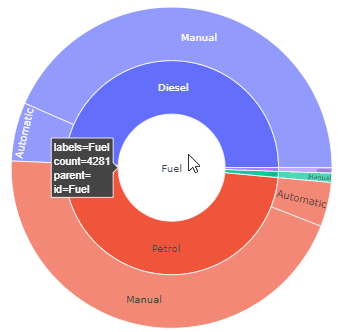

In [ ]:
temp_df=df.copy()
temp_df['count']=1
temp_df['Fuel']='Fuel'
fig = px.sunburst(temp_df, path=[ 'Fuel','fuel', 'transmission'], values='count')
fig.show()

### Observations

A significant share of cars listed online are Diesel and petrol cars, with very small chuck taken by CNG and LPG.
Manual transmission is widespread when compared to automatic.


In [ ]:
df0=df.loc[:,['Class']]
df0['count']=1
df0['Listed']='Vehicle Class'
fig = px.sunburst(df0, path=['Listed','Class'], values='count')
fig.show()

### Observations
Just as expected, hatchbacks rule the Indian roads, when taken into consideration the streets, traffic and the Indian mindset. Hatchbacks give more value for your hard-earned money, which is followed by sedan, Suv and compact Suv segments. As more Indians are moving into "middle" and "upper-middle" class, these segments will see a massive rise in demand.

#### Note: do not forget to click on different parts of the chart to know more in detail

In [ ]:
df0=df.loc[:,['brand','fuel','transmission']]
df0['count']=1
df0['Listed']='Cars Listed of Sale'
fig = px.sunburst(df0, path=['Listed','brand', 'fuel', 'transmission'], values='count',width=900, height=900,)
fig.show()

### Observations
1. most of the cars listed of sale are from Maruti, Hyundai and tata(which is smiliar to the brands popularity in indian market)
2. greater percentage of economical cars are manual transmission.
3. premium brands like VW,Skoda have a small share of automatic transmissions.
4. all luxury brands like Audi,BMW, Land Rover vehicles have only automatic transmission. 

In [ ]:
brands=df['brand'].value_counts().index

fig = plt.figure(figsize=(20,100))

for b,num in zip(brands, range(1,len(brands)+1)):
    if b=='Maruti':
        rot=30
    else:
        rot=0
    df0=df[df['brand']==b]
    listed_car_num=df0.shape[0]
    vc0=df0.Model.value_counts(normalize=True)
    ax = fig.add_subplot(len(brands),1,num)
    sns.barplot(x=vc0.index,y=vc0.values*100,ax=ax,palette='tab10')
    plt.xticks(rotation=rot,horizontalalignment='center',fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel('% of listed cars',fontsize=15)
    ax.set_title(b+' \nNumber of cars listed for sale : '+str(listed_car_num),fontsize=17)

plt.tight_layout()
plt.show()

separating luxury brands from others to look into it with greater detail.

In [ ]:
Luxury_brand=['Audi','BMW','Mercedes-Benz','Jaguar','Land Rover','Volvo']
luxury_df=df[df['brand'].isin(Luxury_brand)].reset_index()
luxury_df.drop('index',axis=1,inplace=True)
regular_df=df[~df['brand'].isin(Luxury_brand)].reset_index()
regular_df.drop('index',axis=1,inplace=True)
print(luxury_df.shape,regular_df.shape)
luxury_df.head()

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
class_order=list(regular_df.groupby(['Class'])['selling_price'].mean().reset_index().sort_values('selling_price')['Class'])

sns.boxplot(x='Class',y='selling_price',data=regular_df,hue='fuel',palette='tab10',order=class_order)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xticks(fontsize=11)
plt.xlabel('Class',fontsize=13)
plt.yticks(fontsize=10)
plt.ylabel('Selling Price',fontsize=13)
plt.title("selling price of different class vehicles(Regular) and fuels",fontsize=14)

plt.subplot(2,1,2)
class_order=list(luxury_df.groupby(['Class'])['selling_price'].mean().reset_index().sort_values('selling_price')['Class'])
sns.boxplot(x='Class',y='selling_price',data=luxury_df,hue='fuel',hue_order=['Petrol','Diesel'],palette='tab10',order=class_order)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xticks(fontsize=11)
plt.xlabel('Class',fontsize=13)
plt.yticks(fontsize=10)
plt.ylabel('Selling Price',fontsize=13)
plt.title("selling price of different class vehicles(Luxury) and fuels",fontsize=14)

plt.tight_layout()

### Observations
as expected Suv's are more expensive in both economical and luxury segments with the median price of diesel Suv's being greater than petrol counterparts.

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
class_order=list(regular_df.groupby(['Class'])['selling_price'].mean().reset_index().sort_values('selling_price')['Class'])

sns.boxplot(x='Class',y='selling_price',data=regular_df,hue='transmission',hue_order=['Automatic','Manual'],palette='tab10',order=class_order)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xticks(fontsize=11)
plt.xlabel('Class',fontsize=13)
plt.yticks(fontsize=10)
plt.ylabel('Selling Price',fontsize=13)
plt.title("selling price of different class vehicles(Regular) and transmission",fontsize=14)

plt.subplot(2,1,2)
class_order=list(luxury_df.groupby(['Class'])['selling_price'].mean().reset_index().sort_values('selling_price')['Class'])
sns.boxplot(x='Class',y='selling_price',data=luxury_df,hue='transmission',hue_order=['Automatic','Manual'],palette='tab10',order=class_order)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xticks(fontsize=11)
plt.xlabel('Class',fontsize=13)
plt.yticks(fontsize=10)
plt.ylabel('Selling Price',fontsize=13)
plt.title("selling price of different class vehicles(Luxury) and transmission",fontsize=14)

plt.tight_layout()

### Observations
When it comes to transmission, automatic cars are expensive when compared to manual cars, because of the complexity and electronics involved in the automatic vehicles.

In [ ]:
plt.figure(figsize=(25,12))
plt.subplot(2,1,1)
sns.boxplot(x='brand',y='km_driven',data=regular_df,palette='tab10')
plt.ylim(0,300000)
plt.xticks(fontsize=11)
plt.xlabel('Brand',fontsize=13)
plt.yticks(fontsize=11)
plt.ylabel('KM Driven',fontsize=13)
plt.title("range of km's driven in each regular brand ",fontsize=14)

plt.subplot(2,1,2)
sns.boxplot(x='brand',y='km_driven',data=luxury_df,palette='tab10')
plt.ylim(0,175000)
plt.xticks(fontsize=11)
plt.xlabel('Brand',fontsize=13)
plt.yticks(fontsize=11)
plt.ylabel('KM Driven',fontsize=13)
plt.title("range of km's driven in each luxury brand ",fontsize=14);

### Observations
1. Brands which produce people movers(vehicles which are popular for taxi's and transportation) have higher median km's travelled when compared to others
2. The median km's covered in luxury brands are lower than in the economical cars(maybe because people who own a luxury car will definitely own other vehicles, in which they might travel regularly)

In [ ]:
plt.figure(figsize=(25,12))

plt.subplot(2,1,1)
sns.boxplot(x='brand',y='selling_price',data=regular_df,palette='tab10')
plt.ylim(0,2200000)
plt.xticks(fontsize=11)
plt.xlabel('Brand',fontsize=13)
plt.yticks(fontsize=11)
plt.ylabel('selling_price',fontsize=13)
plt.title("range of selling_price for each regular brand ",fontsize=14)


plt.subplot(2,1,2)
sns.boxplot(x='brand',y='selling_price',data=luxury_df,palette='tab10')
plt.ylim(0,6000000)
plt.xticks(fontsize=11)
plt.xlabel('Brand',fontsize=13)
plt.yticks(fontsize=11)
plt.ylabel('selling_price',fontsize=13)
plt.title("range of selling_price for each luxury brand ",fontsize=14);

In [ ]:
plt.figure(figsize=(25,12))
plt.subplot(2,1,1)

sns.boxplot(x='brand',y='selling_price',data=regular_df,hue='seller_type',hue_order=['Individual','Dealer','Trustmark Dealer'],palette='tab10')
#plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xticks(fontsize=11)
plt.xlabel('Class',fontsize=13)
plt.yticks(fontsize=10)
plt.ylabel('Selling Price',fontsize=13)
plt.title("selling price of different class vehicles(Regular) and seller type",fontsize=14)

plt.subplot(2,1,2)
class_order=list(luxury_df.groupby(['seller_type'])['selling_price'].mean().reset_index().sort_values('selling_price')['seller_type'])
sns.boxplot(x='brand',y='selling_price',data=luxury_df,hue='seller_type',hue_order=['Individual','Dealer'],palette='tab10')
#plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xticks(fontsize=11)
plt.xlabel('Class',fontsize=13)
plt.yticks(fontsize=10)
plt.ylabel('Selling Price',fontsize=13)
plt.title("selling price of different class vehicles(Luxury) and seller type",fontsize=14)

plt.tight_layout()

### Observations
The median price of vehicle bought from a dealer is greater than when the car is purchased from an owner(individual). (maybe because of the commission of the dealer, dealers restore the vehicle to some sort, and usually, they thoroughly check the components properly before buying to reduce loss which comparatively increases the reliability of cars purchased from the dealer)

In [ ]:
plt.figure(figsize=(25,7))
sns.lineplot(x='vehicle_age',y='selling_price',data=df)
plt.ticklabel_format(style='plain')

Note: This is an interactive plot, click on the different class of vehhicles from the legend to show or hide the points from the plot.(zoom,pan and rotate the plot to know the plot in detail)

In [ ]:
plt.figure(figsize=(25,25))
temp_df=df[((df['selling_price']<2000000)&(df['km_driven']<500000))]
fig = px.scatter_3d(temp_df, x='year', y='km_driven', z='selling_price',
              color='Class')
fig.show()

## Model Building

removing different brands of vehicle whose frequency is very low to be able to help the predictions.

In [ ]:
shape_before=df.shape
vc=df.brand.value_counts(normalize=True)
low_freq_brands=list(vc[vc.values<=0.02].index)

df=df[~df['brand'].isin(low_freq_brands)]
df=df.reset_index()
df.drop('index',axis=1,inplace=True)
df.head()
print(shape_before,df.shape)

In [ ]:
df.drop(['brand','year'],axis=1,inplace=True)
df=df[['Model','vehicle_age','km_driven','fuel','transmission','Class','owner','seller_type','selling_price']]
df.head()

to predict the selling price correctly, atleast 2 data points for a given model is required.(one to train and one to predict on)
if you have only one data point for a given model(for example innova) and this data point is sent to test dataframe, then the quality of the prediction will take a hit as the algorithm was not able to train on the given model.

In [ ]:
vc0=df.Model.value_counts()
low_freq=list(vc0[vc0.values<2].index)
shape_before=df.shape
df=df[~df['Model'].isin(low_freq)].reset_index()
df=df.drop('index',axis=1)
print(shape_before,df.shape)
df.head()

In [ ]:
target='selling_price'
x=list(df.columns)
x.remove(target)


splitting the data into train and test

try to tune hyperparameters by scoring the validation sample, instead of test to prevent overtraining( where you try to fit the model to get the best test result)

as I have very less data, I'm splitting it into only train and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[x],df[target],random_state=10,stratify=df['Model'],test_size=0.25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

x_train.head()

As we have very few instances, instead of removing the outliers (which reduces our data further), a new column is created to flag the rows which have outliers

In [ ]:
def outlier_flag(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_in.loc[((df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)),'outlier_flag']='o_'+col_name
    return df_in

In [ ]:
for data in [x_train,x_test]:
    for col in ['km_driven','vehicle_age']:
        data=outlier_flag(data,col)
    data['outlier_flag'].fillna(value='no_outlier',inplace=True)

target encoding Model and Class columns

In [ ]:
te=ce.TargetEncoder(verbose=1,cols=['Model','Class'])

In [ ]:
x_train=te.fit_transform(x_train,y_train,)
x_test=te.transform(x_test)
x_train.head()

creating dummy columns to deal with categorical data

In [ ]:
x_train=pd.get_dummies(x_train)
x_test=pd.get_dummies(x_test)
print(x_train.shape,x_test.shape)

In [ ]:
print(x_train.shape,x_test.shape)

In [ ]:
#importing required packages for model building
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

function to get mape score

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

function to get learning curves

it is one of the most important metric to select the best model, as it shows the bias and variance of the algorithm

In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [ ]:
#creating parameter grid for random search
grid_forest_1={'criterion':['mse','mae'],
      'n_estimators':np.arange(5,100,10),
      'max_depth':np.arange(2,7,1),
      'min_samples_split':np.arange(0.01,0.1,0.01),
      'max_features':['log2','sqrt','auto'],    
      'min_weight_fraction_leaf':np.arange(0.001,0.25,0.05)
}

rf_random=RandomizedSearchCV(estimator=rf,param_distributions=grid_forest_1,n_iter=500,n_jobs=-1,cv=3,verbose=1,random_state=1)


rf_random.fit(x_train,y_train)


In [ ]:
rf_random=rf_random.best_estimator_
np.sqrt(mean_squared_error(rf_random.predict(x_test),y_test))

learning curve looks good(low bias and low variance), grid search can be done to increase the model performance

In [ ]:
plot_learning_curve(estimator=rf_random,title='RF_learning_curves',X=x_train,y=y_train,ylim=(0.5,1.05),cv=5)

In [ ]:
rf_random

selecting hyperparameter values closer to best random search hyperparameters to do an exhaustive search.

In [ ]:
grid_forest_2={'criterion':['mae'],
      'n_estimators':np.arange(60,80,5),
      'max_depth':(6,7,8),
      'min_samples_split':np.arange(0.001,0.01,0.008),
      'max_features':['auto'],    
      'min_weight_fraction_leaf':np.arange(0.001,0.1,0.008)
}

In [ ]:
rf=RandomForestRegressor()
grid_search_rf=GridSearchCV(estimator=rf,param_grid = grid_forest_2,cv=3,n_jobs=-1,verbose=1)
grid_search_rf.fit(x_train,y_train)

In [ ]:
grid_search_rf=grid_search_rf.best_estimator_
grid_search_rf.fit(x_train,y_train)

In [ ]:
plot_learning_curve(estimator=grid_search_rf,title='RF_learning_curves',X=x_train,y=y_train,ylim=(0.5,1.05),cv=5)

In [ ]:
y_pred=grid_search_rf.predict(x_test)
print("\t\tError Table")
print('Mean Absolute Percentage Error  : ', mean_absolute_percentage_error(y_test, y_pred))
print('Root Mean Squared  Error        : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R Squared Error                 : ', r2_score(y_test, y_pred))

Before going,humble request if you liked the notebook the Please Upvote ( It motivates me )

And Stay Tuned... I WILL BE ADDING LINK OF DEPLOYED MODEL SOON IN COMMENT SECTION If not done till Know